# Gradient Boosted Trees

In [16]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score

In [12]:
maldata=pd.read_csv('./malware.csv',sep='|')

x=maldata.drop(['Name', 'md5', 'legitimate'], axis=1).values
y=maldata['legitimate'].values

feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)

number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]

model=GradientBoostingClassifier()
model.fit(x_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

## Accuracy

In [9]:
y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

Train Accuracy: 98.9775643679
Test Accuracy: 98.8096100447


## Null Accuracy

In [14]:
print(max(y_test.mean(), 1 - y_test.mean())*100)

69.7838947241


## Confusion Matrix

In [13]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

Accuracy: 57.966920198
Misclassification: 42.033079802
Sensitivity: 29.8945181397
Specificty: 70.1221411024
False Positive: 29.8778588976
Precision Score: 30.2278603749


## ROC-AUC

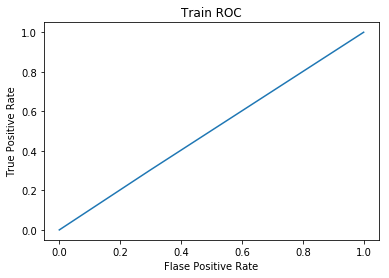

Train AUC: 50.2017083355


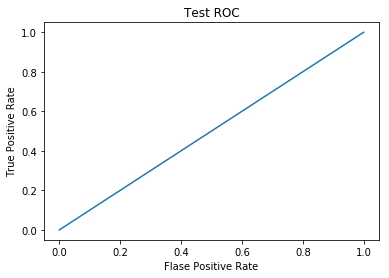

Test AUC: 50.008329621
Mean Cross-Val AUC Score: 99.8197083781


In [17]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain)*100)



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest)*100)



print("Mean Cross-Val AUC Score:",cross_val_score(model, x, y, cv=10, scoring='roc_auc').mean()*100)

## Parameter Tuning

1) n_estimators: # of small trees to use in ensemble

2) learning_rate: controls emphasis on fixing errors from previous iteration

3) max_depth: Usually set to 3-5  

In [18]:
param_grid={
    
    "n_estimators" : [50],
    "max_depth" : [3,4,5],
    "min_samples_leaf" : [40]
}

In [ ]:
tuned_classifier=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')
tuned_classifier.fit(x,y)

print(tuned_classifier.best_score_)
print(tuned_classifier.best_params_)
print(tuned_classifier.best_estimator_)

## Train model with best parameters

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

# Results

In [ ]:
y_predtrain=model.predict(x_train)
print("Train Accuracy:",metrics.accuracy_score(y_train,y_predtrain)*100)

y_predtest=model.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test,y_predtest)*100)

In [ ]:
confusion=confusion_matrix(y_test,y_predtest)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

In [ ]:
fpr,tpr,threshold=metrics.roc_curve(y_train,y_predtrain)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.show()

print("Train AUC:",metrics.roc_auc_score(y_train,y_predtrain))



fpr,tpr,threshold=metrics.roc_curve(y_test,y_predtest)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,y_predtest))